## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset

In [2]:
df=pd.read_csv('autos.csv',encoding='ISO-8859-1')


In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


In [5]:
df.shape

(371528, 20)

## Cleaning the dataset

In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
# Droping the Unwanted Columns
df.drop(columns= ['seller', 'offerType', 'nrOfPictures'], inplace = True)


In [8]:
df.drop(columns= ['dateCrawled', 'dateCreated', 'name','lastSeen'], inplace = True)

## Missing Values

In [9]:
#check missing values
df.isnull().sum()

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
dtype: int64

In [10]:
#replacing the missing values
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['model'].fillna(df['model'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)

In [11]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,test,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,70435
1,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,66954
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,90480
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


In [12]:
df.tail()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
371523,2200,test,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein,39576
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,26135
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,87439
371526,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein,40764
371527,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,73326


In [13]:
df.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dtype: int64

## Remove the duplicates values

In [14]:
# Checking for Duplicates
df.duplicated().sum()

16293

In [15]:
# Removing Duplicates
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

## label Encoding

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355235 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   price                355235 non-null  int64 
 1   abtest               355235 non-null  object
 2   vehicleType          355235 non-null  object
 3   yearOfRegistration   355235 non-null  int64 
 4   gearbox              355235 non-null  object
 5   powerPS              355235 non-null  int64 
 6   model                355235 non-null  object
 7   kilometer            355235 non-null  int64 
 8   monthOfRegistration  355235 non-null  int64 
 9   fuelType             355235 non-null  object
 10  brand                355235 non-null  object
 11  notRepairedDamage    355235 non-null  object
 12  postalCode           355235 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 37.9+ MB


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['model'] = le.fit_transform(df['model'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355235 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   price                355235 non-null  int64
 1   abtest               355235 non-null  int32
 2   vehicleType          355235 non-null  int32
 3   yearOfRegistration   355235 non-null  int64
 4   gearbox              355235 non-null  int32
 5   powerPS              355235 non-null  int64
 6   model                355235 non-null  int32
 7   kilometer            355235 non-null  int64
 8   monthOfRegistration  355235 non-null  int64
 9   fuelType             355235 non-null  int32
 10  brand                355235 non-null  int32
 11  notRepairedDamage    355235 non-null  int64
 12  postalCode           355235 non-null  int64
dtypes: int32(6), int64(7)
memory usage: 29.8 MB


In [20]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,1,6,1993,1,0,118,150000,0,1,38,0,70435
1,18300,1,3,2011,1,190,118,125000,5,3,1,1,66954
2,9800,1,7,2004,0,163,119,125000,8,3,14,0,90480
3,1500,1,4,2001,1,75,118,150000,6,1,38,0,91074
4,3600,1,4,2008,1,69,103,90000,7,3,31,0,60437


In [21]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,1,6,1993,1,0,118,150000,0,1,38,0,70435
1,18300,1,3,2011,1,190,118,125000,5,3,1,1,66954
2,9800,1,7,2004,0,163,119,125000,8,3,14,0,90480
3,1500,1,4,2001,1,75,118,150000,6,1,38,0,91074
4,3600,1,4,2008,1,69,103,90000,7,3,31,0,60437


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'abtest'}>,
        <AxesSubplot: title={'center': 'vehicleType'}>,
        <AxesSubplot: title={'center': 'yearOfRegistration'}>],
       [<AxesSubplot: title={'center': 'gearbox'}>,
        <AxesSubplot: title={'center': 'powerPS'}>,
        <AxesSubplot: title={'center': 'model'}>,
        <AxesSubplot: title={'center': 'kilometer'}>],
       [<AxesSubplot: title={'center': 'monthOfRegistration'}>,
        <AxesSubplot: title={'center': 'fuelType'}>,
        <AxesSubplot: title={'center': 'brand'}>,
        <AxesSubplot: title={'center': 'notRepairedDamage'}>],
       [<AxesSubplot: title={'center': 'postalCode'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

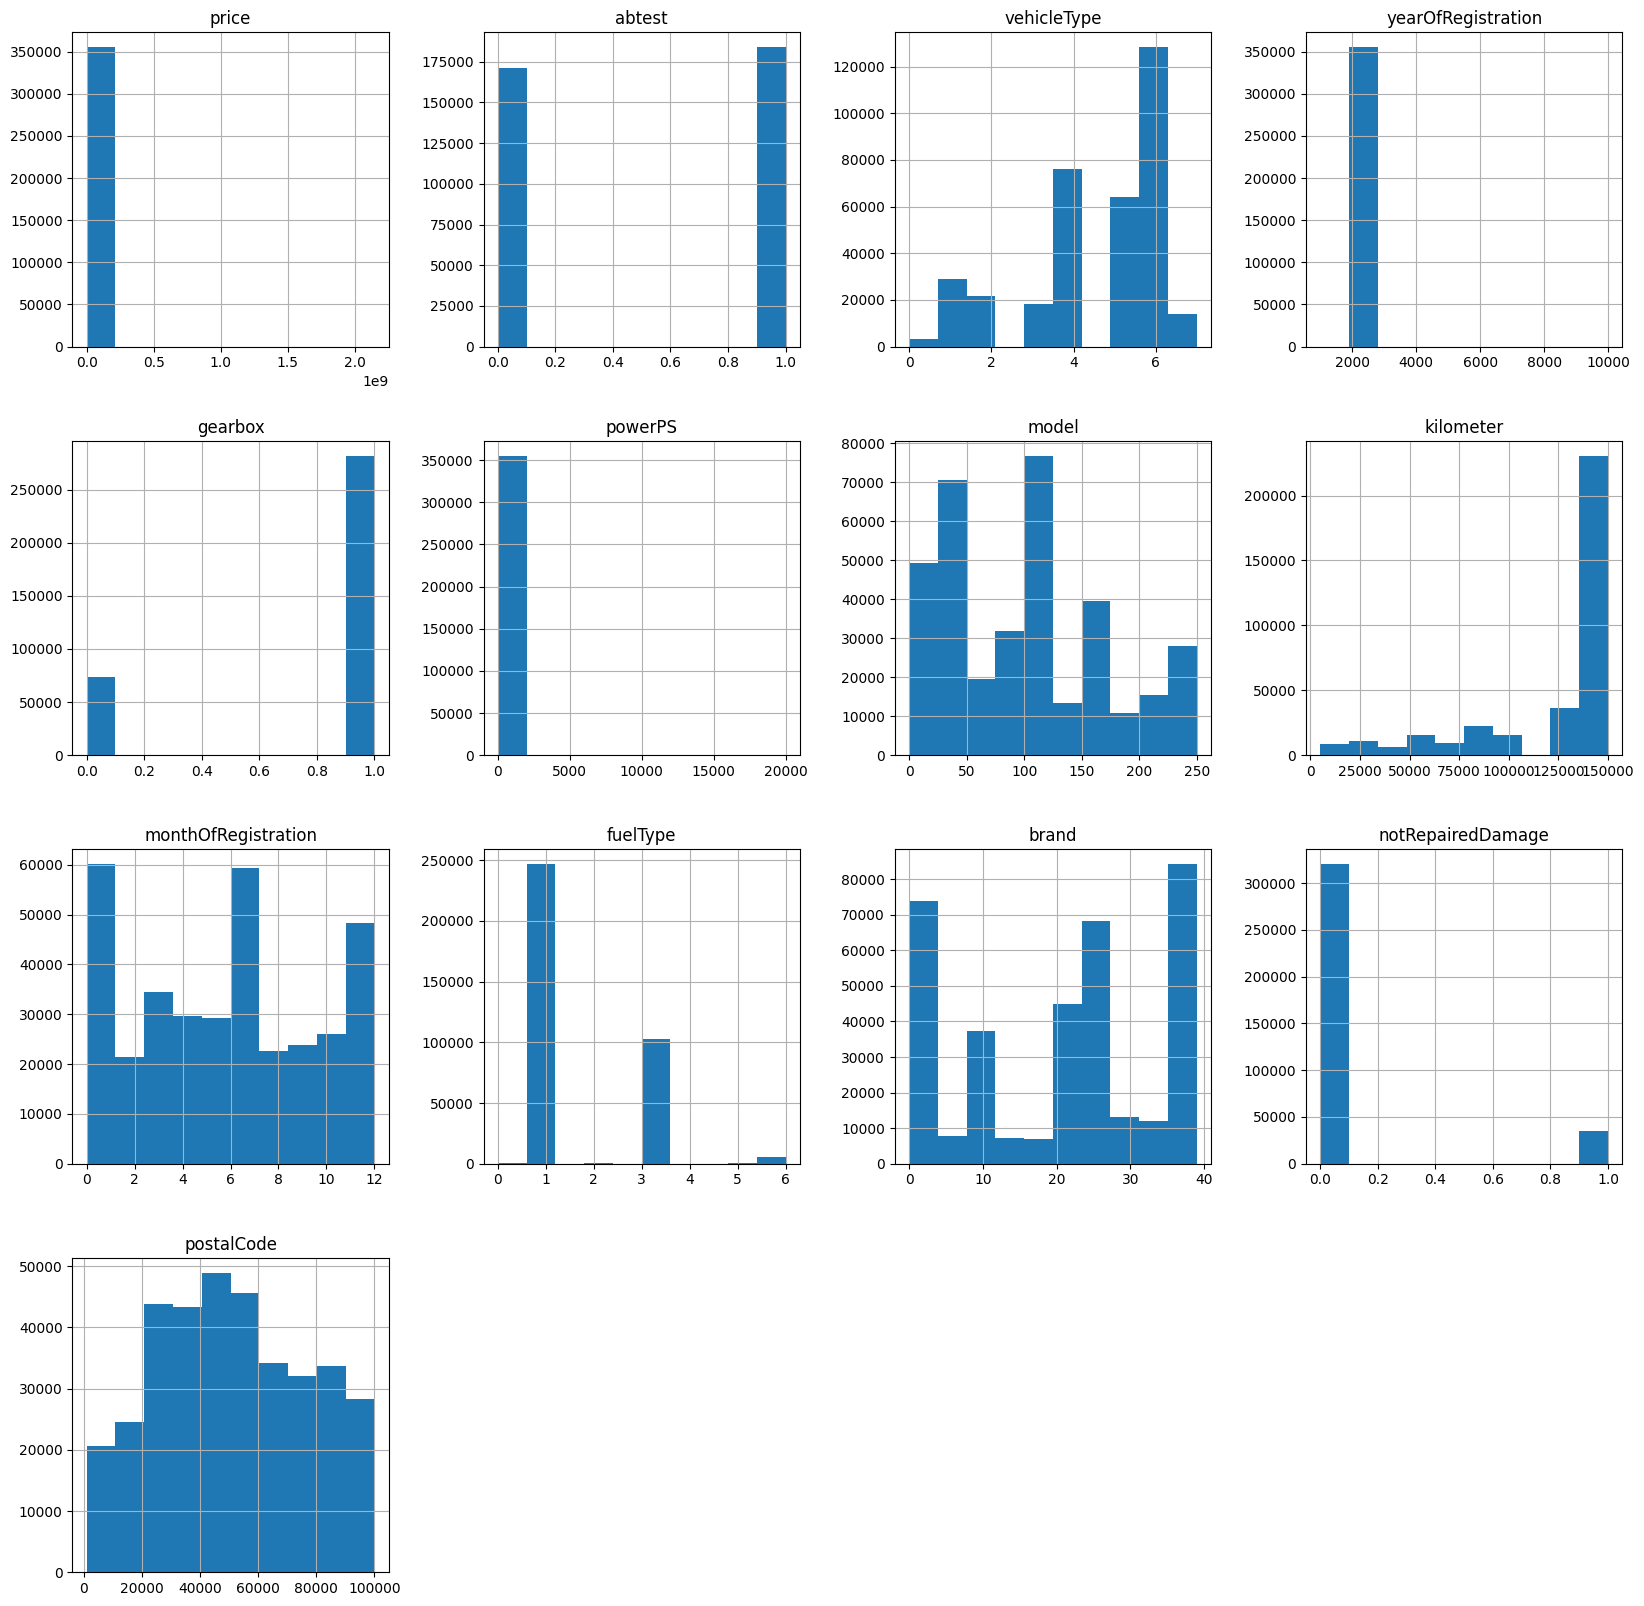

In [22]:
df.hist(figsize=(20,20))

<AxesSubplot: >

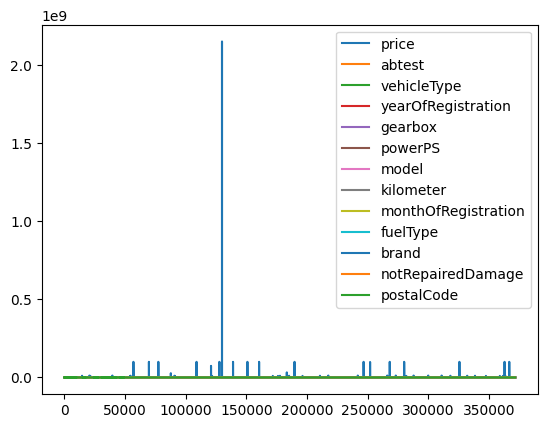

In [23]:
df.plot()

## Replacing the Outliers

<AxesSubplot: >

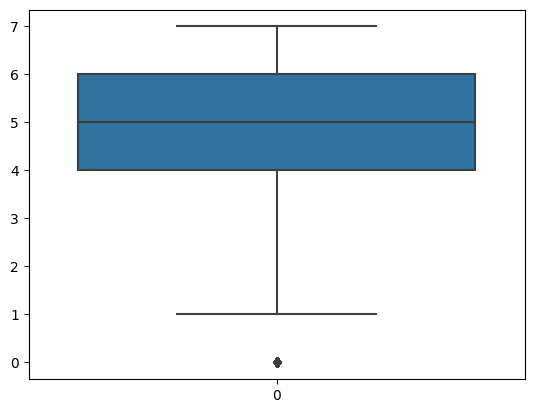

In [24]:
sns.boxplot(df['vehicleType'])

In [25]:
q1=df["vehicleType"].quantile(0.25)  
q3=df["vehicleType"].quantile(0.75)
q1


4.0

In [26]:
q3

6.0

In [27]:
IQR=q3-q1

In [28]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [29]:
upper_limit

9.0

In [30]:
lower_limit

1.0

In [31]:
df.median()

price                    2911.0
abtest                      1.0
vehicleType                 5.0
yearOfRegistration       2003.0
gearbox                     1.0
powerPS                   105.0
model                     104.0
kilometer              150000.0
monthOfRegistration         6.0
fuelType                    1.0
brand                      23.0
notRepairedDamage           0.0
postalCode              49688.0
dtype: float64

In [32]:
df["vehicleType"]= np.where(df["vehicleType"]<lower_limit,5.0,df["vehicleType"])

<AxesSubplot: >

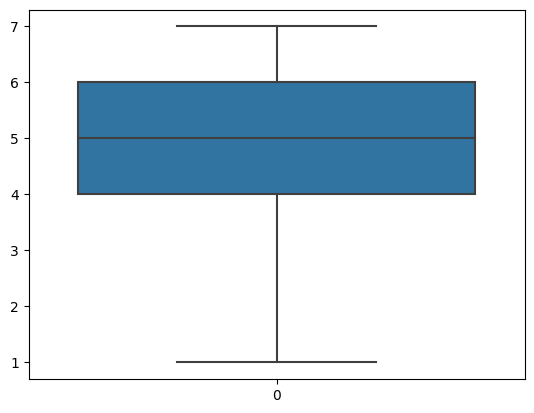

In [33]:
sns.boxplot(df["vehicleType"])

<AxesSubplot: >

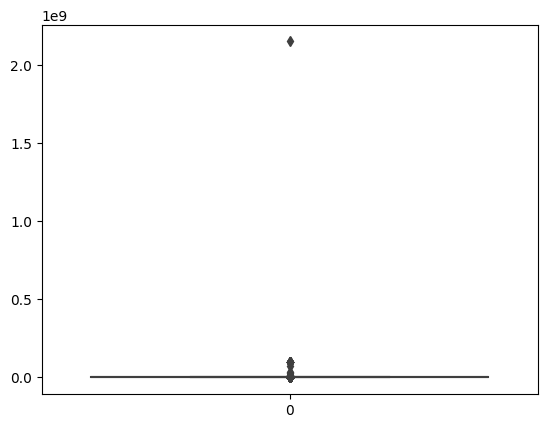

In [34]:
sns.boxplot(df['price'])

In [35]:
q1=df["price"].quantile(0.25)  
q3=df["price"].quantile(0.75)
q1

1100.0

In [36]:
q3

7100.0

In [37]:
IQR=q3-q1

In [38]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [39]:
upper_limit


16100.0

In [40]:
lower_limit

-7900.0

In [41]:
df["price"]= np.where(df["price"]>upper_limit,16150.0,df["price"])

<AxesSubplot: >

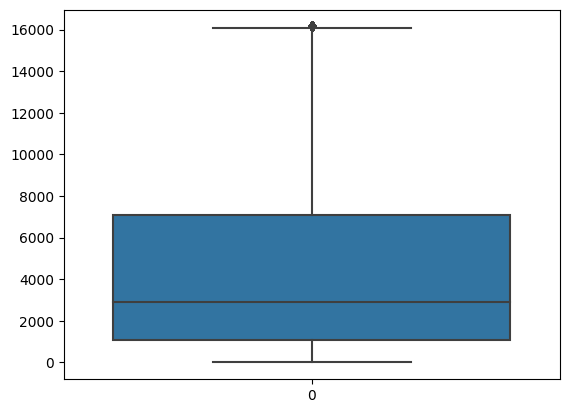

In [42]:
sns.boxplot(df['price'])

<AxesSubplot: xlabel='yearOfRegistration'>

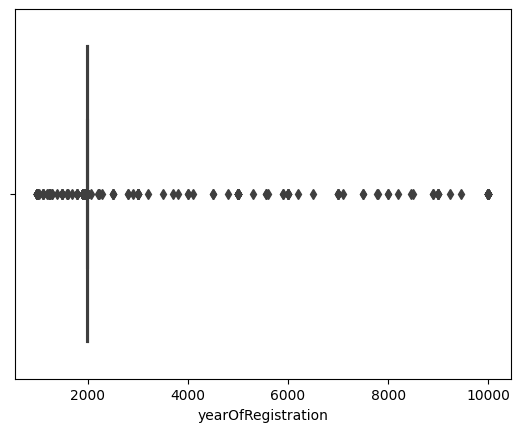

In [43]:
sns.boxplot(x = df['yearOfRegistration'])

In [44]:
q1=df["yearOfRegistration"].quantile(0.25)  
q3=df["yearOfRegistration"].quantile(0.75)
q1

1999.0

In [45]:
q3

2008.0

In [46]:
IQR=q3-q1

In [47]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [48]:
upper_limit

2021.5

In [49]:
lower_limit

1985.5

In [50]:
df["yearOfRegistration"]= np.where(df["yearOfRegistration"]<lower_limit,2003.0,df["yearOfRegistration"])

<AxesSubplot: xlabel='yearOfRegistration'>

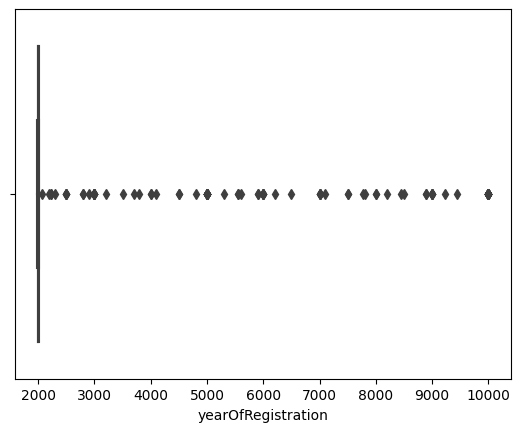

In [51]:
sns.boxplot(x = df['yearOfRegistration'])

In [52]:
df["yearOfRegistration"]= np.where(df["yearOfRegistration"]>upper_limit,2003.0,df["yearOfRegistration"])

<AxesSubplot: xlabel='yearOfRegistration'>

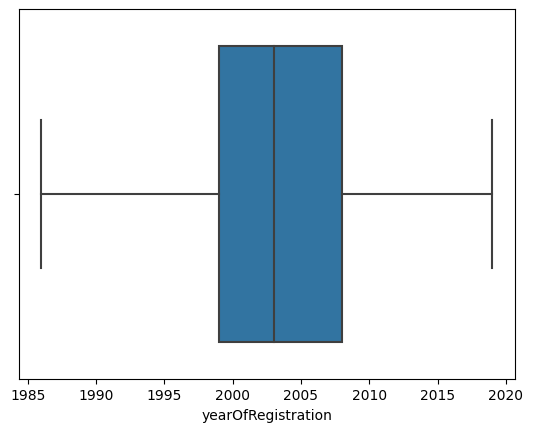

In [53]:
sns.boxplot(x = df['yearOfRegistration'])

<AxesSubplot: >

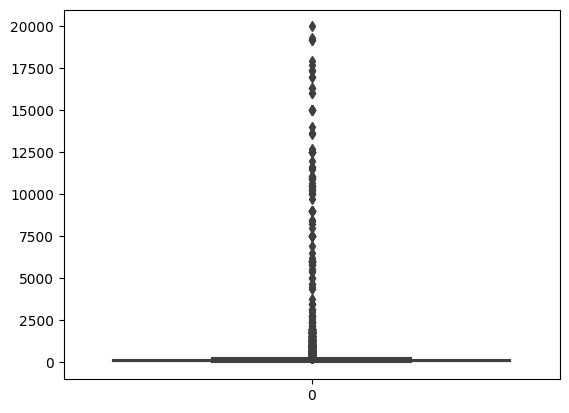

In [54]:
sns.boxplot(df['powerPS'])

In [55]:
q1=df["powerPS"].quantile(0.25)  
q3=df["powerPS"].quantile(0.75)
q1

69.0

In [56]:
q3

150.0

In [57]:
IQR=q3-q1

In [58]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [59]:
upper_limit

271.5

In [60]:
lower_limit

-52.5

In [61]:
df["powerPS"]= np.where(df["powerPS"]>upper_limit,270.0,df["powerPS"])

<AxesSubplot: >

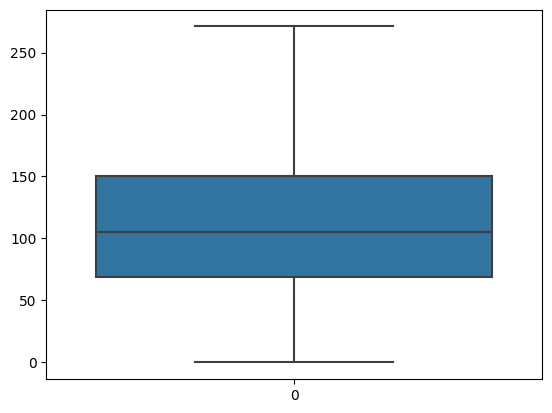

In [62]:
sns.boxplot(df['powerPS'])

<AxesSubplot: >

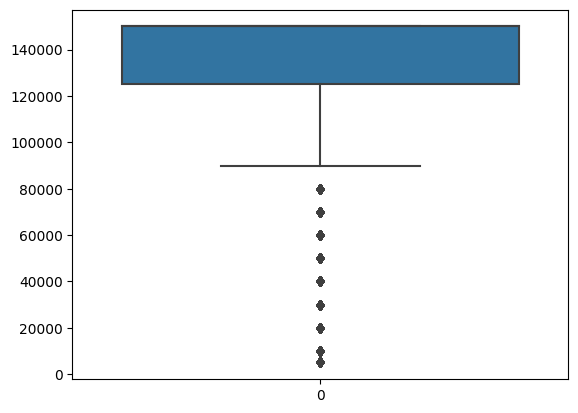

In [63]:
sns.boxplot(df['kilometer'])

In [64]:
q1=df["kilometer"].quantile(0.25)  
q3=df["kilometer"].quantile(0.75)
q1

125000.0

In [65]:
q3

150000.0

In [66]:
IQR=q3-q1

In [67]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [68]:
upper_limit

187500.0

In [69]:
lower_limit

87500.0

In [70]:
df["kilometer"]= np.where(df["kilometer"]<lower_limit,87500.0,df["kilometer"])

<AxesSubplot: >

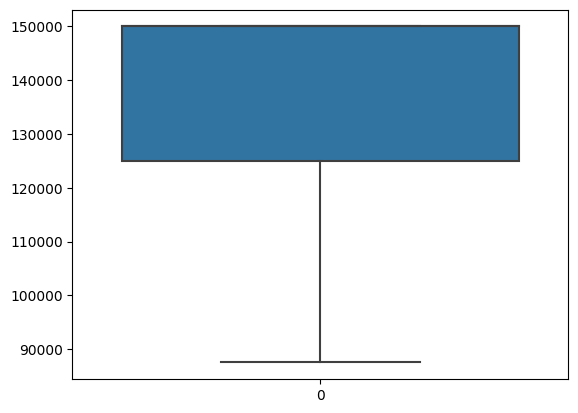

In [71]:
sns.boxplot(df['kilometer'])

In [72]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480.0,1,6.0,1993.0,1,0.0,118,150000.0,0,1,38,0,70435
1,16150.0,1,3.0,2011.0,1,190.0,118,125000.0,5,3,1,1,66954
2,9800.0,1,7.0,2004.0,0,163.0,119,125000.0,8,3,14,0,90480
3,1500.0,1,4.0,2001.0,1,75.0,118,150000.0,6,1,38,0,91074
4,3600.0,1,4.0,2008.0,1,69.0,103,90000.0,7,3,31,0,60437


# Split the Data into Dependent and Independent variables.

In [73]:
x=df.drop(columns=['price'],axis=1)
x

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,1,6.0,1993.0,1,0.0,118,150000.0,0,1,38,0,70435
1,1,3.0,2011.0,1,190.0,118,125000.0,5,3,1,1,66954
2,1,7.0,2004.0,0,163.0,119,125000.0,8,3,14,0,90480
3,1,4.0,2001.0,1,75.0,118,150000.0,6,1,38,0,91074
4,1,4.0,2008.0,1,69.0,103,90000.0,7,3,31,0,60437
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,1,6.0,2005.0,1,0.0,118,87500.0,1,1,33,0,39576
371524,1,2.0,2000.0,0,101.0,108,125000.0,3,1,32,0,26135
371525,1,1.0,1996.0,1,102.0,225,150000.0,3,3,38,0,87439
371526,1,5.0,2002.0,1,100.0,118,150000.0,6,3,38,0,40764


In [74]:
y = df['price']
y

0           480.0
1         16150.0
2          9800.0
3          1500.0
4          3600.0
           ...   
371523     2200.0
371524     1199.0
371525     9200.0
371526     3400.0
371527    16150.0
Name: price, Length: 355235, dtype: float64

## Scaling the independent variables

In [75]:
from sklearn.preprocessing import scale

In [76]:
dfN=pd.DataFrame(scale(x),columns=x.columns)
dfN.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,0.964994,0.853723,-1.690688,0.510562,-1.704962,0.232065,0.680603,-1.539458,-0.622338,1.296505,-0.332459,0.754563
1,0.964994,-0.991448,1.106354,0.510562,1.239962,0.232065,-0.293065,-0.193243,1.280939,-1.474099,3.007886,0.619636
2,0.964994,1.468780,0.018615,-1.958628,0.821473,0.246403,-0.293065,0.614487,1.280939,-0.500643,-0.332459,1.531523
3,0.964994,-0.376391,-0.447558,0.510562,-0.542492,0.232065,0.680603,0.076001,-0.622338,1.296505,-0.332459,1.554547
4,0.964994,-0.376391,0.640180,0.510562,-0.635490,0.017005,-1.656202,0.345244,1.280939,0.772337,-0.332459,0.367032


In [77]:
dfN.shape

(355235, 12)

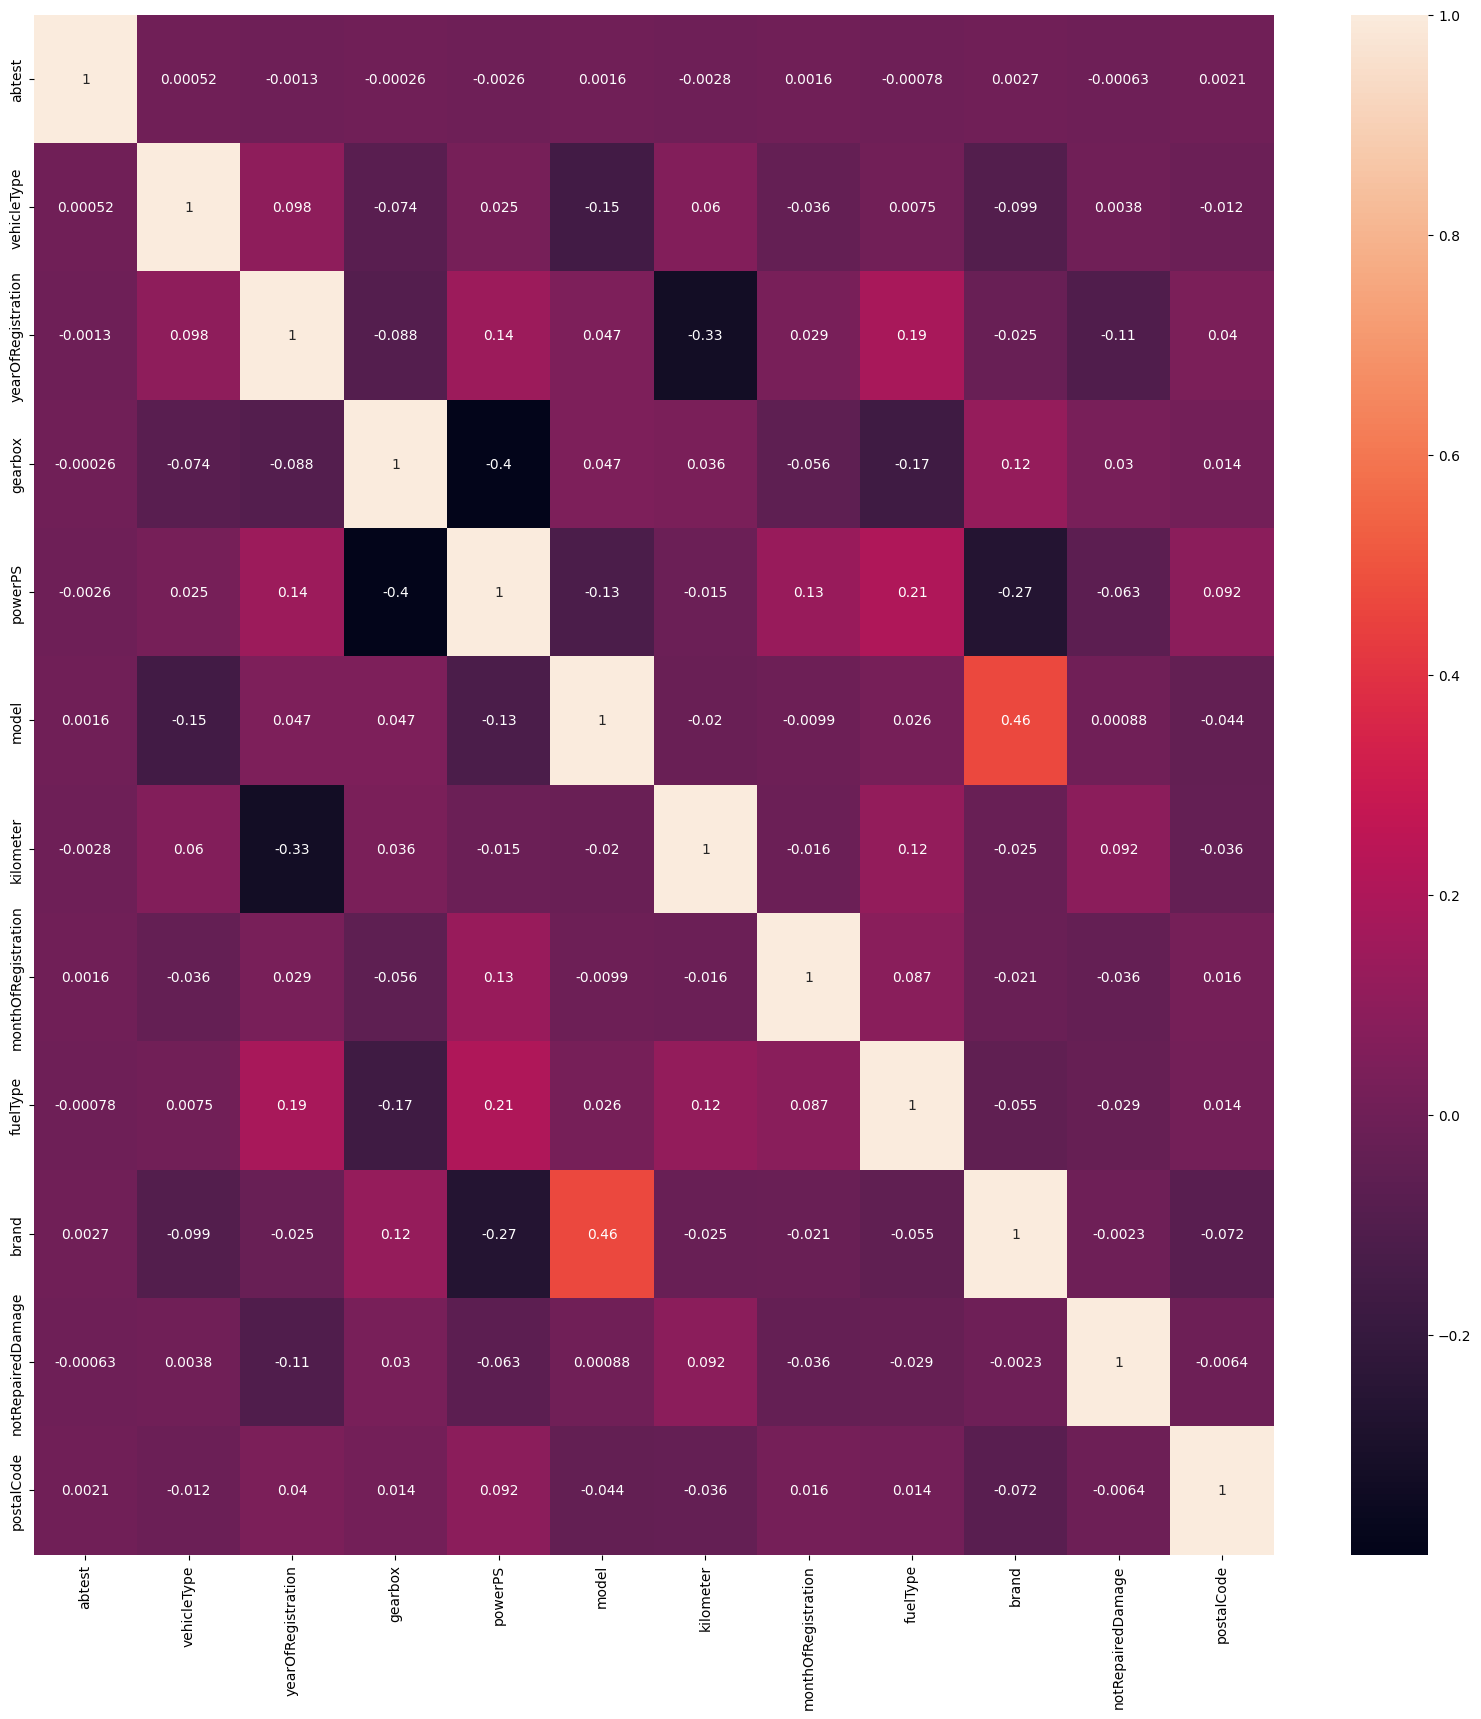

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(dfN.corr(), annot = True)
plt.show()

In [ ]:
sns.pairplot(dfN)
plt.show()

## Descriptive statistics

In [79]:
dfN.nunique()

abtest                    2
vehicleType               7
yearOfRegistration       34
gearbox                   2
powerPS                 271
model                   251
kilometer                 5
monthOfRegistration      13
fuelType                  7
brand                    40
notRepairedDamage         2
postalCode             8150
dtype: int64

In [80]:
dfN.describe()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
count,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05,3.552350e+05
mean,-2.880295e-17,-2.258631e-16,-1.181477e-14,1.272130e-16,-4.228433e-17,-4.160426e-17,1.053008e-16,9.993023e-17,-8.572878e-17,5.516565e-17,4.243434e-17,9.035925e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.036276e+00,-2.221562e+00,-2.778427e+00,-1.958628e+00,-1.704962e+00,-1.459747e+00,-1.753569e+00,-1.539458e+00,-1.573976e+00,-1.548980e+00,-3.324595e-01,-1.934198e+00
25%,-1.036276e+00,-3.763910e-01,-7.583407e-01,5.105616e-01,-6.354899e-01,-8.862514e-01,-2.930655e-01,-7.317289e-01,-6.223376e-01,-8.750491e-01,-3.324595e-01,-7.873428e-01
50%,9.649937e-01,2.386661e-01,-1.367759e-01,5.105616e-01,-7.750425e-02,3.134192e-02,6.806034e-01,7.600065e-02,-6.223376e-01,1.732875e-01,-3.324595e-01,-4.960806e-02
75%,9.649937e-01,8.537231e-01,6.401802e-01,5.105616e-01,6.199779e-01,7.338743e-01,6.806034e-01,8.837302e-01,1.280939e+00,9.220994e-01,-3.324595e-01,8.032463e-01
max,9.649937e-01,1.468780e+00,2.349484e+00,5.105616e-01,2.495430e+00,2.124602e+00,6.806034e-01,1.691460e+00,4.135855e+00,1.371387e+00,3.007886e+00,1.900449e+00


In [81]:
dfN.skew()

abtest                -0.071283
vehicleType           -0.856657
yearOfRegistration     0.147721
gearbox               -1.448072
powerPS                0.314831
model                  0.407406
kilometer             -0.966475
monthOfRegistration    0.082817
fuelType               1.486970
brand                 -0.150972
notRepairedDamage      2.675437
postalCode             0.057159
dtype: float64

In [82]:
dfN.kurt()

abtest                -1.994930
vehicleType           -0.180186
yearOfRegistration    -0.318545
gearbox                0.096913
powerPS                0.002984
model                 -0.895174
kilometer             -0.867842
monthOfRegistration   -1.141852
fuelType               2.198215
brand                 -1.325496
notRepairedDamage      5.157994
postalCode            -0.978047
dtype: float64

# Split the data into training and testing

In [83]:
dfN.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,0.964994,0.853723,-1.690688,0.510562,-1.704962,0.232065,0.680603,-1.539458,-0.622338,1.296505,-0.332459,0.754563
1,0.964994,-0.991448,1.106354,0.510562,1.239962,0.232065,-0.293065,-0.193243,1.280939,-1.474099,3.007886,0.619636
2,0.964994,1.468780,0.018615,-1.958628,0.821473,0.246403,-0.293065,0.614487,1.280939,-0.500643,-0.332459,1.531523
3,0.964994,-0.376391,-0.447558,0.510562,-0.542492,0.232065,0.680603,0.076001,-0.622338,1.296505,-0.332459,1.554547
4,0.964994,-0.376391,0.640180,0.510562,-0.635490,0.017005,-1.656202,0.345244,1.280939,0.772337,-0.332459,0.367032


In [84]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfN, y, test_size=0.2, random_state=0)

## BUILDING MODELS

In [85]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [86]:
# LASSO

In [87]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train, y_train)

C:\Users\nojma\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.01, normalize=True)

In [88]:
# RIDGE 

In [89]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(x_train, y_train)

C:\Users\nojma\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.01, normalize=True)

In [90]:
# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [92]:
# KNN

In [93]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [94]:
# Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

# Checking the Metrics of the models

In [96]:
# Linear Regression
lr.score(x_test, y_test)

0.6102441855155436

In [97]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

3069.737210625298

In [98]:
# Lasso Regression
lasso.score(x_test, y_test)

0.6102100396328701

In [99]:
np.sqrt(mean_squared_error(y_test,lasso.predict(x_test)))

3069.871675060572

In [100]:
# Ridge Regression
ridge.score(x_test, y_test)

0.6101936885044719

In [101]:
np.sqrt(mean_squared_error(y_test,ridge.predict(x_test)))

3069.936062736794

In [102]:
# K Nearest Neighbour
knn.score(x_test, y_test)

0.7868837023736911

In [103]:
np.sqrt(mean_squared_error(y_test,knn.predict(x_test)))

2269.9339930168885

In [104]:
# Decision Tree
DT.score(x_test, y_test)

0.7550967906067618

In [105]:
np.sqrt(mean_squared_error(y_test,DT.predict(x_test)))

2433.3363033031414

In [106]:
# Random Forest
RF.score(x_test, y_test)

0.8689132519910943

In [107]:
np.sqrt(mean_squared_error(y_test,RF.predict(x_test)))

1780.2635175626808

## Save the Model

In [108]:
import joblib
joblib.dump(RF,'CRF.pkl')

['CRF.pkl']